# Lab 4 - Cross-Correlation & Spectral Analysis Problems

Spencer Y. Ki

Prof. D. Jones

PHY408H1S

Wednesday, the 5th of April, 2023.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Cross-correlation (8 marks, 4/4)

Collaborators: None

It has been shown that noise records at two seismic stations, when cross-correlated and stacked,
are very closely associated with the Green's function between these two seismic stations (i.e. given
a delta force at one station, the displacement recorded at the other station). On Quercus,
two files are given: one is a vertical component seismogram at PHL (Park Hill) and the other is
a vertical component seismogram at MLAC (Mammoth Lakes). Both are records for one day (24
hours) on February 1, 2003. Sampling rate is $dt = 1.0$ seconds.

 1. Take the cross-correlation (using FFT) of these seismograms using the record at PHL as $x(t)$
    and that at MLAC as $y(t)$ and plot $C_{xy}(\tau)$. Zoom in your plot between [-300; 300] seconds.

Text(0.5, 1.0, 'Cross-correlation between PHL and MLAC')

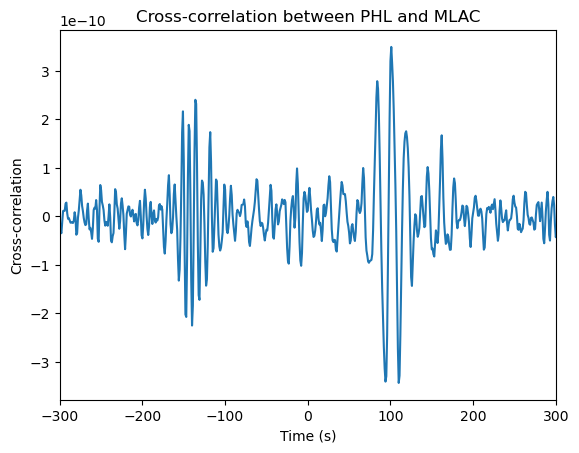

In [2]:
# Load data
phl = np.loadtxt('PHL_data.txt').flatten()
mlac = np.loadtxt('MLAC_data.txt').flatten()

# Cross-correlate
phl_ft = np.fft.fft(phl)
mlac_ft = np.fft.fft(mlac)
cross_corr = np.fft.fftshift(np.fft.ifft(phl_ft * np.conj(mlac_ft)))
t = np.arange(-86400/2, 86400/2, 1)

# Plot
plt.plot(t, np.real(cross_corr))
plt.xlim([-300, 300])
plt.xlabel('Time (s)')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between PHL and MLAC')

2. Bit conversion is often used for the cross-correlation Greens function approach. It simply
    changes any positive numbers to 1 and negative numbers to -1 (numpy `sign()` function).
    Apply this to the data at PHL and MLAC and compute their cross-correlation. Compare
    the results against those from the previous step. Does bit-conversion work in this case to
    preserve the phase information of the true cross-correlation? (Note the amplitude of
    bit-converted cross-correlation is of no meaning).

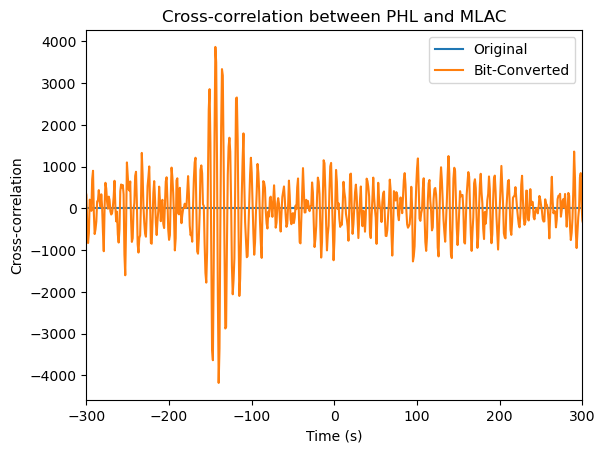

In [3]:
# Bit conversion
phl_bit = np.sign(phl)
mlac_bit = np.sign(mlac)

# Cross-correlate
phl_bit_ft = np.fft.fft(phl_bit)
mlac_bit_ft = np.fft.fft(mlac_bit)
cross_corr_bit = np.fft.fftshift(np.fft.ifft(phl_bit_ft * np.conj(mlac_bit_ft)))

# Plot the original and bit-converted cross-correlations
plt.plot(t, np.real(cross_corr), label = "Original")
plt.plot(t, np.real(cross_corr_bit), label = "Bit-Converted")
plt.xlim([-300, 300])
plt.xlabel('Time (s)')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between PHL and MLAC')
plt.legend()

Comparing the above two plots, one can see that the bit-converted cross-correlation has a similar shape and peak position to the original cross-correlation, indicating that the phase information is preserved.

# Normal Modes from Long Period Seismometer (7 marks, 1/2/2/1/1)

Collaborators: None

Background: The solid earth 'rings' like a bell after being struck by a great earthquake. These
are the normal modes associated with internal structures (density and elastic moduli) of the Earth,
and the excitation amplitudes of these modes are determined by the earthquake source mechanism.
The frequencies of these normal modes of oscillation are very low, usually between 0.1 milliHertz
(mHz) and 10 mHz. It is hard to see them above 10 mHz because these higher frequency modes
attenuate quickly, or the frequency spacings are too small to be identified individually. Because
the Earth is a complex structure, with twisting, breathing, and more complex spatial structure in
its modes, the modal frequencies are not simple multiples of a single fundamental as is the case
for a guitar string. They are labelled with a notation (e.g. like $_0S_2$ for spheroidal modes or like
$_1T_8$ for toroidal modes) based on the spherical harmonic spatial distribution that the mode corresponds
to, in the same way that the electron wavefunctions for the Hydrogen atom are labelled. Geophysicists
measure these frequencies because they can be used to invert for models of the Earth's
internal seismic velocity and density structures. With very high-resolution data, one can even see
splitting of these resonances due to the Earth’s rotation and elliptical shape, in a matter analogous
to the Zeeman splitting of atomic spectral lines. You can also optically detect similar phenomenon
('helioseismology') going on in the sun, from which one can also test models of the sun's interior.
(More descriptions can be found on any introductory solid-earth geophysics book).
Here we examine three days of very long period seismic data recorded on the horizontal direction at
station NWAO (Narrogin, Western Australia) after the devastating $M_w = 9.0$, Mar 11th, 2011 Honshu,
Japan earthquake. Data `nwao.vh1` (VH channel, $dt = 10 \text{ sec}$) is given as an ascii
file with two columns: time and velocity (in counts from the digitizer).

 1. Plot the raw data with a time axis in hours.

Text(0.5, 1.0, 'Raw NWAO Data')

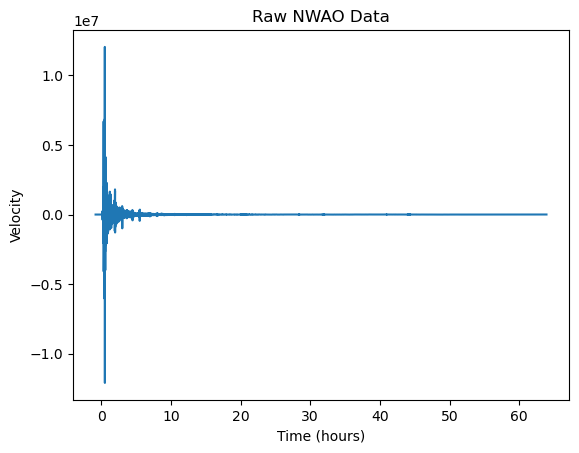

In [4]:
# Load data
dat = np.loadtxt('nwao.vh1', unpack = True)
t = dat[0] / 3600
v = dat[1]

# plot data
plt.plot(t, v)
plt.xlabel('Time (hours)')
plt.ylabel('Velocity')
plt.title("Raw NWAO Data")

 2. Plot the power spectrum of your raw data as a function of frequency (in mHz) **without**
    any windowing.

Text(0.5, 1.0, 'Raw Power Spectrum')

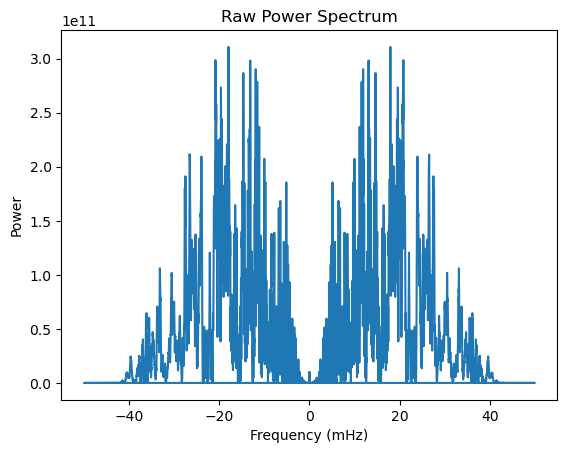

In [5]:
f = np.fft.fftfreq(len(v), 10) * 1000
spec = np.abs(np.fft.fft(v))**2 / len(v)

plt.figure()
plt.plot(f, spec)
plt.xlabel("Frequency (mHz)")
plt.ylabel("Power")
plt.title("Raw Power Spectrum")

 3. Plot the power spectrum of your raw data after 
     - removing the minor linear trend in the same way as Lab 3, and subsequently 
     - applying a hanning window $w_n = 1 - \cos(2 \pi \frac{n}{N}) ; 0 \leq n \leq N$ (where N is the length of the data file)

Text(0.5, 1.0, 'Windowed Power Spectrum')

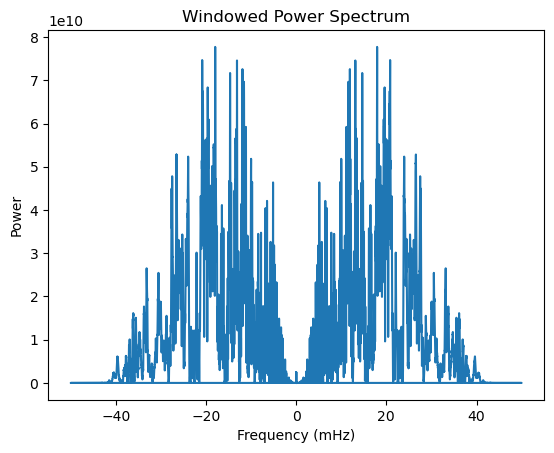

In [6]:
# Detrending
straight = np.polyfit(t, v, 1)
detrend = v - np.polyval(straight, t)

# Hanning window
window = 0.5 * (1 - np.cos(2 * np.pi * t) / (len(detrend)))
v_han = detrend * window

# Power spectrum
spec_han = np.abs(np.fft.fft(v_han))**2 / len(v_han)

# Plot results
plt.figure()
plt.plot(f, spec_han)
plt.xlabel("Frequency (mHz)")
plt.ylabel("Power")
plt.title("Windowed Power Spectrum")

 4. Plot on top of each other the power spectra from 2 and 3 between [0.1, 2.6] mHz, and comment on the difference.

Text(2.44135, 9600000000.0, '0T17')

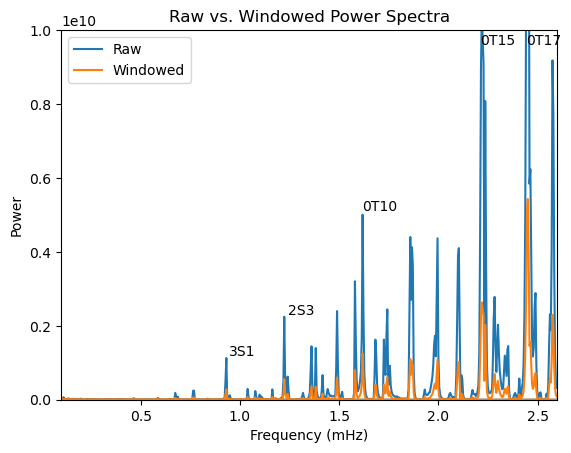

In [7]:
plt.figure()
plt.plot(f, spec, label = "Raw")
plt.plot(f, spec_han, label = "Windowed")
plt.xlabel("Frequency (mHz)")
plt.ylabel("Power")
plt.title("Raw vs. Windowed Power Spectra")
plt.legend()
plt.xlim([0.1, 2.6])
plt.ylim([0, 10000000000])

plt.annotate("3S1", [0.9442, 0.12e10])
plt.annotate("2S3", [1.24296, 0.23e10])
plt.annotate("0T10", [1.61410, 0.51e10])
plt.annotate("0T15", [2.21215, 0.96e10])
plt.annotate("0T17", [2.44135, 0.96e10])

As can be seen in the above plot, applying the Hanning window to the raw data enables the data's power spectra to 

 5. Using plt.annotate(...), identify any normal modes you can see. Use the provided modes.pdf (Table 1) to help guide your identification.

Based on Table 1 of modes.pdf, the above plot has been annotated with observed normal modes.